<a href="https://colab.research.google.com/github/sidiqekob90/stbi-naive-bayes/blob/master/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount ('/content/drive')
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


(11, 2)


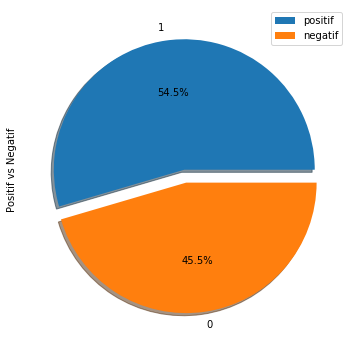

0.75
[[1 0]
 [1 1]]


In [6]:
import pandas as pd
import numpy as np
import sys  

spam_data = pd.read_csv('/gdrive/My Drive/datalagurev.csv')
spam_data['label'] = np.where(spam_data['label']=='positif',1,0)
print(spam_data.shape)
spam_data.head(10)
import matplotlib.pyplot as plt
import seaborn as sns
spam_data["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Positif vs Negatif")
plt.legend(["positif", "negatif"])
plt.show()
from sklearn.model_selection import train_test_split
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(spam_data['text'],spam_data['label'],random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,accuracy_score
#Train and evaluate the model
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)

print(score)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))